In [1]:
#Importing necessary dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
data = pd.read_csv("Autism_Data.csv")

In [4]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,'18 and more',Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,'18 and more',Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,'18 and more',?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,'South Asian',no,no,Pakistan,no,6,'18 and more',Self,NO


In [5]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [6]:
data.shape

(704, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [8]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [9]:
(data['age'].eq('?')).any()

True

In [10]:
(data['ethnicity'].eq('?')).any()

True

In [11]:
(data['relation'].eq('?')).any()

True

In [12]:
data.replace('?',np.nan,inplace=True)

In [13]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [14]:
data.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

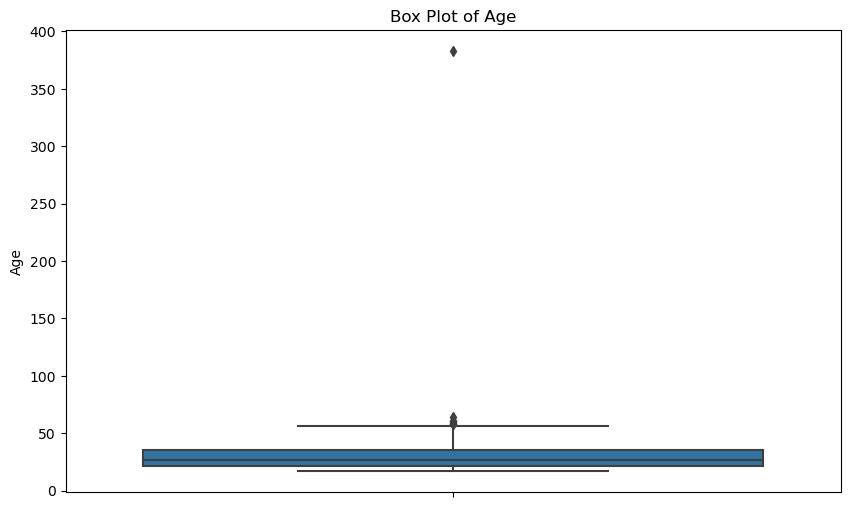

In [15]:
data['age'] = data['age'].apply(lambda x:float(x))
# Draw the box plot for the 'age' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['age'])

# Add titles and labels
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Display the plot
plt.show()


In [16]:
data['age'].max()

383.0

In [17]:
data_p = data
data_p.dropna(inplace=True)

In [18]:
data_t = data_p[data_p['age']!=383]
data_t['age'].mean()

29.63486842105263

In [19]:
data.loc[data.age == 383, 'age'] = 30
data['age'] = data['age'].fillna(30)

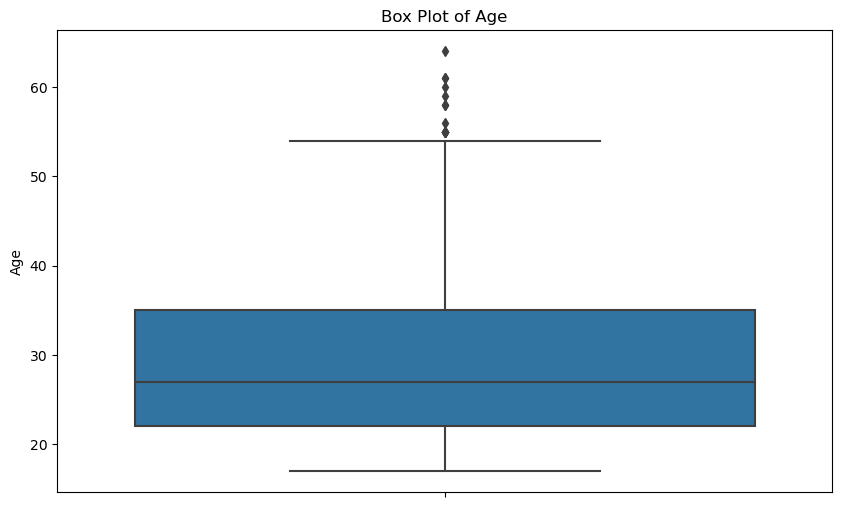

In [20]:
data['age'] = data['age'].apply(lambda x:float(x))
# Draw the box plot for the 'age' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['age'])

# Add titles and labels
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Display the plot
plt.show()


In [21]:
data=data.drop('used_app_before',axis=1)

In [22]:
data=data.drop('ethnicity',axis=1)

In [23]:
data.drop(['contry_of_res','age_desc','relation'],axis=1,inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   609 non-null    int64  
 1   A2_Score   609 non-null    int64  
 2   A3_Score   609 non-null    int64  
 3   A4_Score   609 non-null    int64  
 4   A5_Score   609 non-null    int64  
 5   A6_Score   609 non-null    int64  
 6   A7_Score   609 non-null    int64  
 7   A8_Score   609 non-null    int64  
 8   A9_Score   609 non-null    int64  
 9   A10_Score  609 non-null    int64  
 10  age        609 non-null    float64
 11  gender     609 non-null    object 
 12  jundice    609 non-null    object 
 13  austim     609 non-null    object 
 14  result     609 non-null    int64  
 15  Class/ASD  609 non-null    object 
dtypes: float64(1), int64(11), object(4)
memory usage: 80.9+ KB


In [25]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,yes,no,9,YES


Handling Categorical Data

In [26]:
sex = pd.get_dummies(data['gender'],drop_first=True)

In [27]:
jaund = pd.get_dummies(data['jundice'],drop_first=True,prefix="Had_jaundice")

In [28]:
rel_autism = pd.get_dummies(data['austim'],drop_first=True, prefix = "Rel_had")

In [29]:
detected = pd.get_dummies(data['Class/ASD'],drop_first=True,prefix="Detected")

In [30]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,yes,no,9,YES


In [31]:
data = data.drop(['gender','jundice','austim','Class/ASD'],axis=1)

In [32]:
data_featured = pd.concat([data,sex,jaund,rel_autism,detected],axis=1)

In [33]:
data_featured.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes,Detected_YES
0,1,1,1,1,0,0,1,1,0,0,26.0,6,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5,1,0,1,0
2,1,1,0,1,1,0,1,1,1,1,27.0,8,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6,0,0,1,0
5,1,1,1,1,1,0,1,1,1,1,36.0,9,1,1,0,1


C:\Users\VAIBHAV YADAV\AppData\Local\Temp\ipykernel_29616\219094534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_featured['age'],bins=50,kde=False)


<Axes: xlabel='age'>

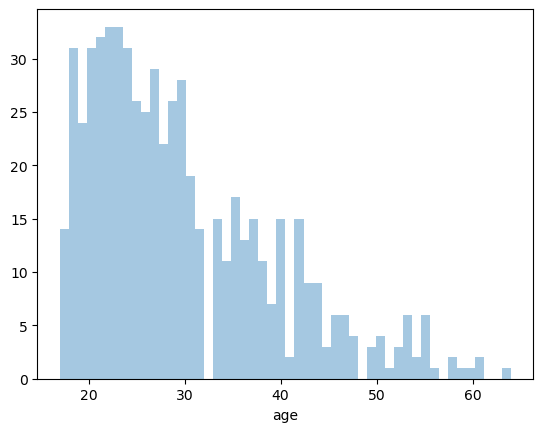

In [34]:
sns.distplot(data_featured['age'],bins=50,kde=False)

<Axes: xlabel='Detected_YES', ylabel='count'>

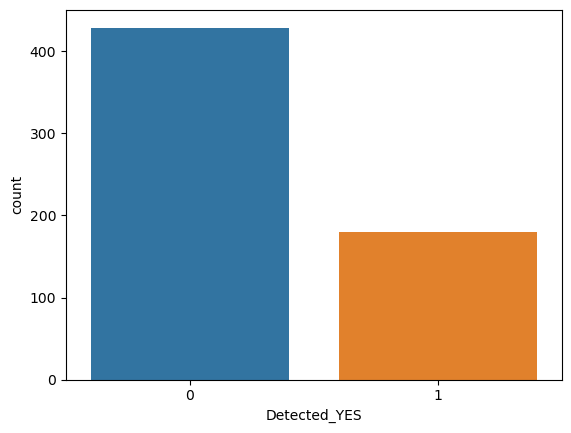

In [35]:
sns.countplot(x='Detected_YES',data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

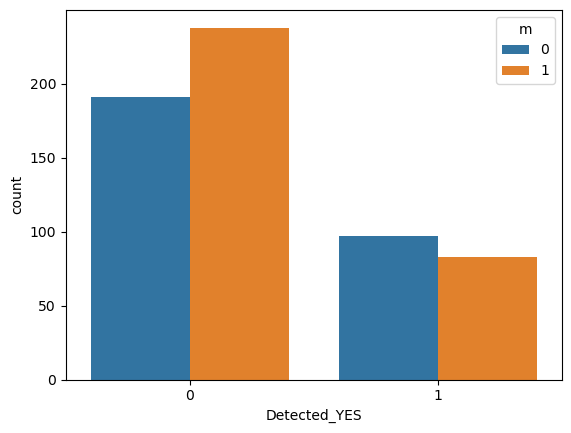

In [36]:
sns.countplot(x='Detected_YES',hue='m',data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

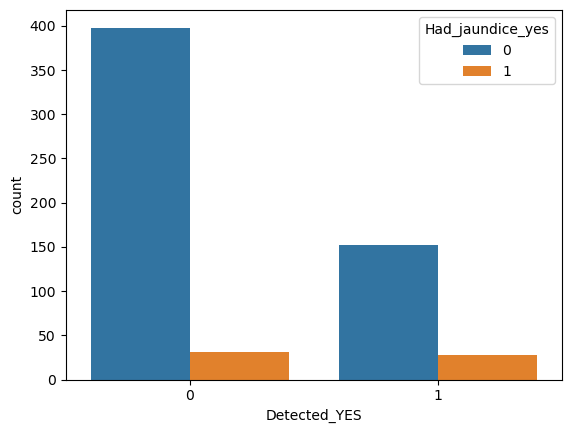

In [37]:
sns.countplot(x='Detected_YES',hue='Had_jaundice_yes',data=data_featured)

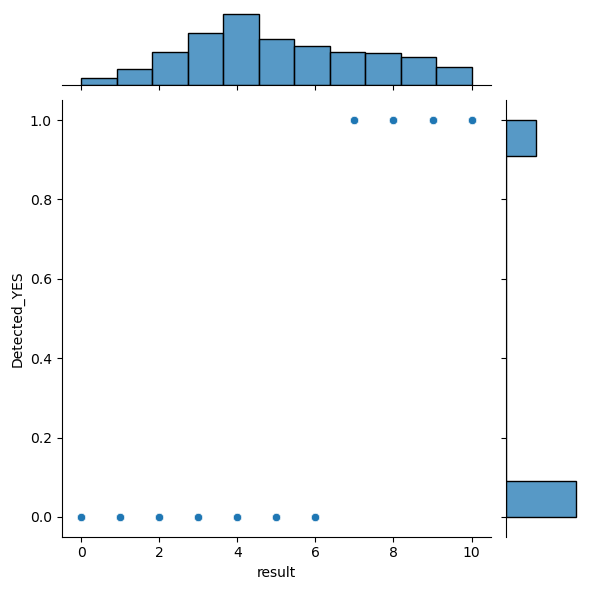

In [38]:
sns.jointplot(x='result',y='Detected_YES',data=data_featured)

<Axes: >

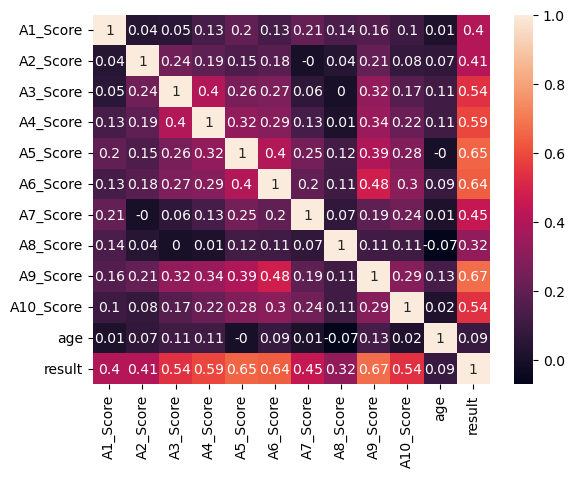

In [39]:
sns.heatmap(data.corr().round(2),annot=True)

In [40]:
X = data_featured[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
          'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score',
         'age','result','m','Had_jaundice_yes','Rel_had_yes']]
y = data_featured['Detected_YES']

In [41]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes
0,1,1,1,1,0,0,1,1,0,0,26.0,6,0,0,0
1,1,1,0,1,0,0,0,1,0,1,24.0,5,1,0,1
2,1,1,0,1,1,0,1,1,1,1,27.0,8,1,1,1
3,1,1,0,1,0,0,1,1,0,1,35.0,6,0,0,1
5,1,1,1,1,1,0,1,1,1,1,36.0,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,10,0,0,0
699,0,1,0,1,1,0,1,1,1,1,25.0,7,0,0,0
700,1,0,0,0,0,0,0,1,0,1,34.0,3,1,0,0
702,1,0,0,1,1,0,1,0,1,1,35.0,6,1,0,0


In [42]:
X.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,29.635468,5.077176,0.527094,0.096880,0.139573
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,9.686116,2.522717,0.499676,0.296038,0.346828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000,1.000000,1.000000,1.000000


In [43]:
y

0      0
1      0
2      1
3      0
5      1
      ..
698    1
699    1
700    0
702    0
703    1
Name: Detected_YES, Length: 609, dtype: uint8

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_s=sc.fit_transform(X)
X = pd.DataFrame(x_s)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=21)

In [46]:
X_train.shape

(548, 15)

In [47]:
y_train.shape

(548,)

In [48]:
X_test.shape

(61, 15)

# Logistic Regression

In [49]:
y_test.shape

(61,)

In [50]:
lgr = LogisticRegression()

In [51]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=0.1)  # L2 regularization with inverse regularization strength of 0.1
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [53]:
pred = lgr.predict(X_test)

In [54]:
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [55]:
lgr.score(X_train,y_train)

1.0

In [56]:
lgr.score(X_test,y_test)

1.0

In [57]:
accuracy_lr = lgr.score(X_test,y_test)*100

In [58]:
accuracy_lr

100.0

In [59]:
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        20

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [60]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
f1

1.0

In [61]:
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        20

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



# SVC

In [62]:
svm = SVC(kernel = 'rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [63]:
svm.score(X_train,y_train)

0.9981751824817519

In [64]:
svm.score(X_test,y_test)

0.9836065573770492

In [65]:
accuracy_SVM = svm.score(X_test,y_test)*100

In [66]:
accuracy_SVM

98.36065573770492

In [67]:
pred = svm.predict(X_test)

In [68]:
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.95      0.97        20

    accuracy                           0.98        61
   macro avg       0.99      0.97      0.98        61
weighted avg       0.98      0.98      0.98        61



In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[41  0]
 [ 1 19]]


# Decision Tree

In [70]:
dt = DecisionTreeClassifier()

In [71]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [73]:
dt.score(X_train,y_train)

1.0

In [74]:
dt.score(X_test,y_test)

1.0

In [75]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt)*100
accuracy_dt

100.0

# KNN

In [76]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p=2)

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred = knn.predict(X_test)

In [79]:
accuracy_KNN = accuracy_score(y_test, y_pred)*100
accuracy_KNN

96.72131147540983

In [80]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.95      0.95      0.95        20

    accuracy                           0.97        61
   macro avg       0.96      0.96      0.96        61
weighted avg       0.97      0.97      0.97        61



In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40  1]
 [ 1 19]]


# Random Forest

In [82]:
rand_forest = RandomForestClassifier(random_state=42)

In [83]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rand_forest.predict(X_test)

In [85]:
accuracy_RF = rand_forest.score(X_test,y_pred)*100

In [86]:
accuracy_RF

100.0

In [87]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        20

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [88]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
f1

1.0

In [89]:
import pickle

In [90]:
pickle.dump(knn,open('Model.pkl','wb'))

In [91]:
knn.predict([[1,1,1,1,0,0,1,1,0,0,26,6,0,0,0]])

array([1], dtype=uint8)

In [92]:
#Create a table to compare the accuracies of each model

accuracy_df = pd.DataFrame({
    'Model' : ['Logistic Regression' , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN'],
    'Accuracy' : [accuracy_lr*100, accuracy_SVM*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100]})
print(accuracy_df)

                 Model      Accuracy
0  Logistic Regression  10000.000000
1                  SVM   9836.065574
2        Decision Tree  10000.000000
3        Random Forest  10000.000000
4                  KNN   9672.131148


Text(0, 0.5, 'Accuracy')

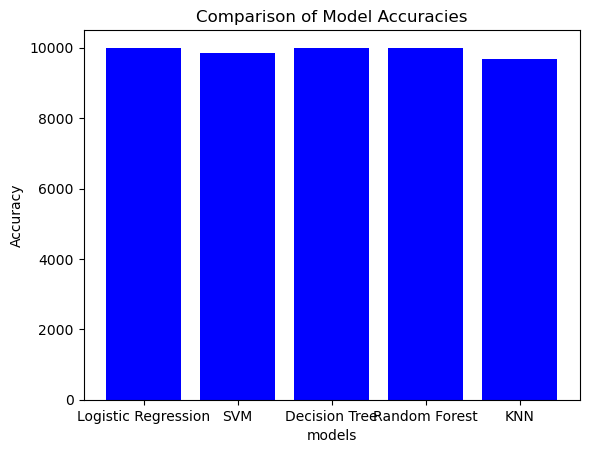

In [93]:
models = ['Logistic Regression' , 'SVM' , 'Decision Tree' , 'Random Forest' , 'KNN']

accuracies = [accuracy_lr*100, accuracy_SVM*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100]
plt.bar(models, accuracies, color = 'blue')

#Add title and axis labels 
plt.title('Comparison of Model Accuracies')
plt.xlabel('models')
plt.ylabel('Accuracy')

In [94]:
import joblib
classifier = joblib.dump(rand_forest,'rand_forest.pkl')